In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Ad_table (extra).csv")
df.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,...,400.0,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0


In [3]:
df.columns.tolist()

['Maker',
 ' Genmodel',
 ' Genmodel_ID',
 'Adv_ID',
 'Adv_year',
 'Adv_month',
 'Color',
 'Reg_year',
 'Bodytype',
 'Runned_Miles',
 'Engin_size',
 'Gearbox',
 'Fuel_type',
 'Price',
 'Engine_power',
 'Annual_Tax',
 'Wheelbase',
 'Height',
 'Width',
 'Length',
 'Average_mpg',
 'Top_speed',
 'Seat_num',
 'Door_num']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         268255 non-null  object 
 1    Genmodel     268255 non-null  object 
 2    Genmodel_ID  268255 non-null  object 
 3   Adv_ID        268255 non-null  object 
 4   Adv_year      268255 non-null  int64  
 5   Adv_month     268255 non-null  int64  
 6   Color         246380 non-null  object 
 7   Reg_year      268248 non-null  float64
 8   Bodytype      267301 non-null  object 
 9   Runned_Miles  267200 non-null  object 
 10  Engin_size    266191 non-null  object 
 11  Gearbox       268088 non-null  object 
 12  Fuel_type     267846 non-null  object 
 13  Price         267110 non-null  float64
 14  Engine_power  236444 non-null  float64
 15  Annual_Tax    221580 non-null  object 
 16  Wheelbase     240257 non-null  float64
 17  Height        240454 non-null  float64
 18  Widt

### Data Cleaning and Preparation

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

In [6]:
df.drop(columns=["adv_id", "genmodel_id", "annual_tax"], inplace=True)

In [7]:
#Missing Values mit 0.0L auffüllen und L-Zeichen hinzufügen wo es fehlt, sodass danach mit apply nur die zahlen mit x[:-1] gesliced werden können
df["engin_size"].fillna("0.0L", inplace=True)
df["engin_size"] = df["engin_size"].apply(lambda x: x + "L" if "L" not in x else x)
df["engin_size"] = df["engin_size"].apply(lambda x: x[:-1])

In [8]:
# Umwandeln der kategorischen Spalten in numerische Spalten 

obj_to_num = ["runned_miles", "engin_size", "top_speed"]

for col in obj_to_num:
    df[col] = df[col].apply(lambda x: str(x).replace("nan", "0"))
    df[col] = df[col].apply(lambda x: str(x).split(" ")[0])
    df[col] = pd.to_numeric(df[col])
    print("ready")

ready
ready
ready


In [9]:
# Entfernen der Spalten die mit der Zielvariable Preis eine Korrelation von weniger als 0.1 haben
df.drop(list(df.corr()[np.abs(df.corr()["price"])< 0.1]["price"].index), axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   color         246380 non-null  object 
 3   reg_year      268248 non-null  float64
 4   bodytype      267301 non-null  object 
 5   runned_miles  268255 non-null  int64  
 6   gearbox       268088 non-null  object 
 7   fuel_type     267846 non-null  object 
 8   price         267110 non-null  float64
 9   engine_power  236444 non-null  float64
 10  width         240175 non-null  float64
 11  length        240454 non-null  float64
 12  average_mpg   226322 non-null  object 
 13  seat_num      261781 non-null  float64
 14  door_num      263702 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 30.7+ MB


In [11]:
# Funktion die zuerst bei allen kategorischen Spalten das mpg entfernt
# dann werden die Hersteller ermittelt, die kein Hersteller-Durchschnitt des jeweiligen Attributs zur Verfügung stellen können und diese werden entfernt
# danach wird über alle Auto-Namen iteriert und die NAN Values des besagten Attributs werden durch den Hersteller-Durchschnitt des Attributs aufgefüllt
# die restlichen NANs werden durch den Modell-Durchschnitt des besagten Attributs aufgefüllt, dies passiert in der zweiten for-Schleife
def fill_na_from_class(df, attr):
    if (df[attr].dtype == "object"):
        df[attr] = pd.to_numeric(df[attr].str.replace(" mpg", ""))
    maker_to_drop = list(df.groupby(by="maker")[attr].mean()[df.groupby(by="maker")[attr].mean().isna()].index)
    df.drop(df[df["maker"].isin(maker_to_drop)].index, axis=0, inplace=True)
    df["maker"] = df["maker"].apply(lambda x: x.replace(" ", ""))
    df["name"] = df["maker"] + " " + df["genmodel"]
    auto_list = df["name"].unique()
    
    for auto in auto_list:
        if auto in list(df.groupby(by="name")[attr].mean()[df.groupby(by="name")[attr].mean().isna()].index):
            df[df["name"] == auto] = df[df["name"] == auto].fillna(df[df["maker"] == auto.split(" ")[0]].mean())
            
    missing_value_auto = list(df[df[attr].isna()]["name"].unique())
    
    for auto in auto_list:
        if auto in missing_value_auto:
            df[df["name"] == auto] = df[df["name"] == auto].fillna(df[df["name"] == auto].mean())
            
    return df

In [12]:
df_mean = df.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   color         246380 non-null  object 
 3   reg_year      268248 non-null  float64
 4   bodytype      267301 non-null  object 
 5   runned_miles  268255 non-null  int64  
 6   gearbox       268088 non-null  object 
 7   fuel_type     267846 non-null  object 
 8   price         267110 non-null  float64
 9   engine_power  236444 non-null  float64
 10  width         240175 non-null  float64
 11  length        240454 non-null  float64
 12  average_mpg   226322 non-null  object 
 13  seat_num      261781 non-null  float64
 14  door_num      263702 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 30.7+ MB


In [14]:
fill_na_from_class(df_mean, "engine_power")

C:\Users\konwo\AppData\Local\Temp\ipykernel_3688\63132220.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["name"] == auto] = df[df["name"] == auto].fillna(df[df["maker"] == auto.split(" ")[0]].mean())
C:\Users\konwo\AppData\Local\Temp\ipykernel_3688\63132220.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["name"] == auto] = df[df["name"] == auto].fillna(df[df["maker"] == auto.split(" ")[0]].mean())
C:\Users\konwo\AppData\Local\Temp\ipykernel_3688\63132220.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

,maker,genmodel,color,reg_year,bodytype,runned_miles,gearbox,fuel_type,price,engine_power,width,length,average_mpg,seat_num,door_num,name
0,Bentley,Arnage,Silver,2000.0,Saloon,60000,Automatic,Petrol,21500.0,433.333333,2125.0,5390.0,NaN,5.0,4.0,Bentley Arnage
1,Bentley,Arnage,Grey,2002.0,Saloon,44000,Automatic,Petrol,28750.0,450.000000,2125.0,5390.0,13.7 mpg,5.0,4.0,Bentley Arnage
2,Bentley,Arnage,Blue,2002.0,Saloon,55000,Automatic,Petrol,29999.0,400.000000,2125.0,5390.0,14.7 mpg,5.0,4.0,Bentley Arnage
3,Bentley,Arnage,Green,2003.0,Saloon,14000,Automatic,Petrol,34948.0,433.333333,2125.0,5390.0,NaN,5.0,4.0,Bentley Arnage
4,Bentley,Arnage,Grey,2003.0,Saloon,61652,Automatic,Petrol,26555.0,433.333333,2125.0,5390.0,NaN,5.0,4.0,Bentley Arnage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268245,Volvo,V50,Grey,2008.0,Estate,140000,Manual,Diesel,3185.0,136.000000,1770.0,4522.0,48.7 mpg,5.0,5.0,Volvo V50
268246,Volvo,V50,Blue,2007.0,Estate,158000,Automatic,Diesel,2990.0,180.000000,1770.0,4522.0,40.4 mpg,5.0,5.0,Volvo V50
268247,Volvo,V50,Silver,2009.0,Estate,94000,Automatic,Diesel,4250.0,178.000000,1770.0,4522.0,40.4 mpg,5.0,5.0,Volvo V50
268248,Volvo,V50,Silver,2004.0,Estate,111000,Automatic,Petrol,2895.0,170.000000,1770.0,4514.0,31.0 mpg,5.0,5.0,Volvo V50


In [15]:
fill_na_from_class(df_mean, "average_mpg")

C:\Users\konwo\AppData\Local\Temp\ipykernel_3688\63132220.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["name"] == auto] = df[df["name"] == auto].fillna(df[df["maker"] == auto.split(" ")[0]].mean())
C:\Users\konwo\AppData\Local\Temp\ipykernel_3688\63132220.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["name"] == auto] = df[df["name"] == auto].fillna(df[df["maker"] == auto.split(" ")[0]].mean())
C:\Users\konwo\AppData\Local\Temp\ipykernel_3688\63132220.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

,maker,genmodel,color,reg_year,bodytype,runned_miles,gearbox,fuel_type,price,engine_power,width,length,average_mpg,seat_num,door_num,name
0,Bentley,Arnage,Silver,2000.0,Saloon,60000,Automatic,Petrol,21500.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley Arnage
1,Bentley,Arnage,Grey,2002.0,Saloon,44000,Automatic,Petrol,28750.0,450.000000,2125.0,5390.0,13.700000,5.0,4.0,Bentley Arnage
2,Bentley,Arnage,Blue,2002.0,Saloon,55000,Automatic,Petrol,29999.0,400.000000,2125.0,5390.0,14.700000,5.0,4.0,Bentley Arnage
3,Bentley,Arnage,Green,2003.0,Saloon,14000,Automatic,Petrol,34948.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley Arnage
4,Bentley,Arnage,Grey,2003.0,Saloon,61652,Automatic,Petrol,26555.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley Arnage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268245,Volvo,V50,Grey,2008.0,Estate,140000,Manual,Diesel,3185.0,136.000000,1770.0,4522.0,48.700000,5.0,5.0,Volvo V50
268246,Volvo,V50,Blue,2007.0,Estate,158000,Automatic,Diesel,2990.0,180.000000,1770.0,4522.0,40.400000,5.0,5.0,Volvo V50
268247,Volvo,V50,Silver,2009.0,Estate,94000,Automatic,Diesel,4250.0,178.000000,1770.0,4522.0,40.400000,5.0,5.0,Volvo V50
268248,Volvo,V50,Silver,2004.0,Estate,111000,Automatic,Petrol,2895.0,170.000000,1770.0,4514.0,31.000000,5.0,5.0,Volvo V50


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_cols = df_mean.select_dtypes("object").columns
num_cols = df_mean.select_dtypes(["float64", "int64"]).columns

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

encoder = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("num_imputer", num_imputer, num_cols),
    ("cat_imputer", cat_imputer, cat_cols)
])

In [17]:
df_new = pd.DataFrame(preprocessor.fit_transform(df_mean), columns = list(num_cols) + list(cat_cols))

In [18]:
# Entfernen von Ausreißern und 
df_new.drop(df_new[df_new["runned_miles"] > 1000000].index, axis=0, inplace=True) 
df_new.drop(df_new[df_new["runned_miles"] == 0.0].index, axis=0, inplace=True) 

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266666 entries, 0 to 268133
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reg_year      266666 non-null  object
 1   runned_miles  266666 non-null  object
 2   price         266666 non-null  object
 3   engine_power  266666 non-null  object
 4   width         266666 non-null  object
 5   length        266666 non-null  object
 6   average_mpg   266666 non-null  object
 7   seat_num      266666 non-null  object
 8   door_num      266666 non-null  object
 9   maker         266666 non-null  object
 10  genmodel      266666 non-null  object
 11  color         266666 non-null  object
 12  bodytype      266666 non-null  object
 13  gearbox       266666 non-null  object
 14  fuel_type     266666 non-null  object
 15  name          266666 non-null  object
dtypes: object(16)
memory usage: 34.6+ MB


In [20]:
df_new[num_cols] = df_new[num_cols].astype("float64")

In [21]:
for i in cat_cols:
    value_count = df_new[i].value_counts()
    drop_values = value_count[value_count < 20].index.tolist()
    df_new[i] = df_new[i].apply(lambda x: "Sonstige" if x in drop_values else x)


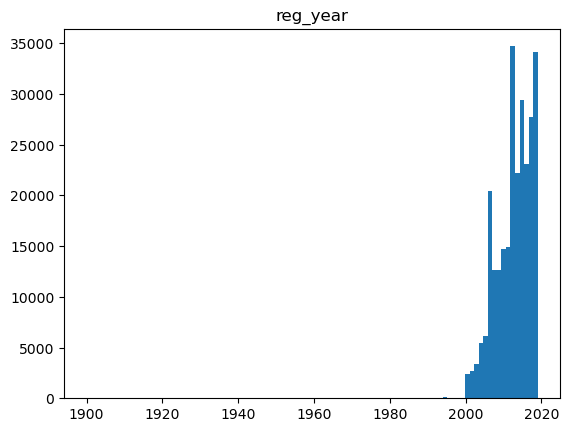

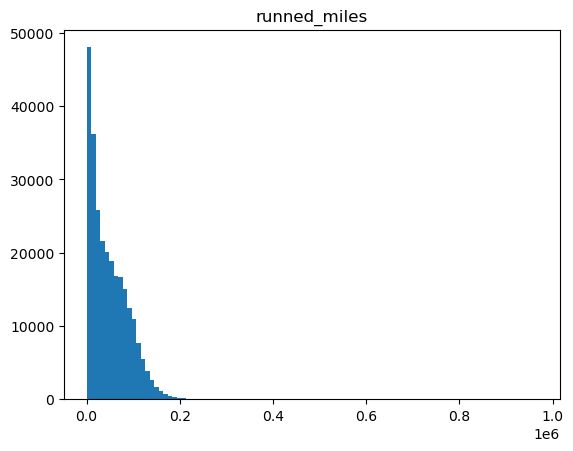

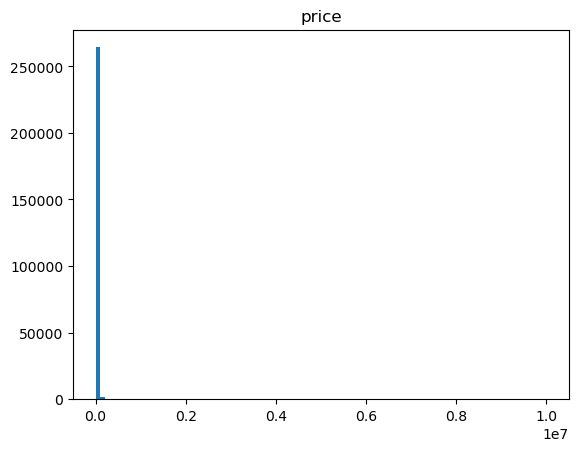

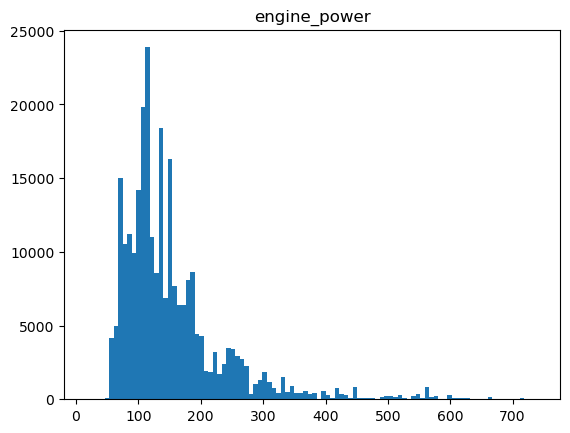

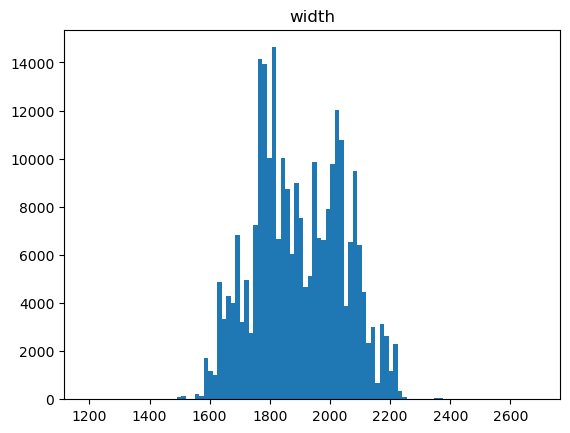

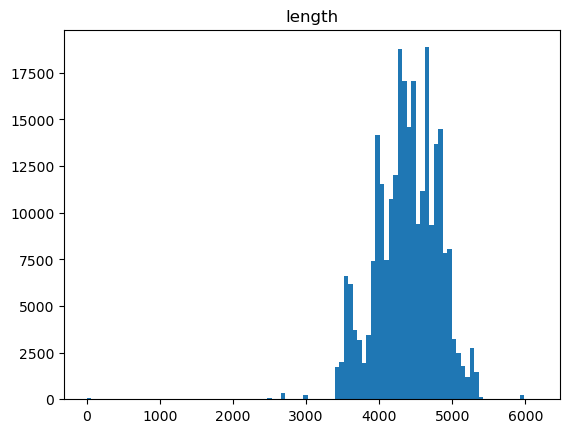

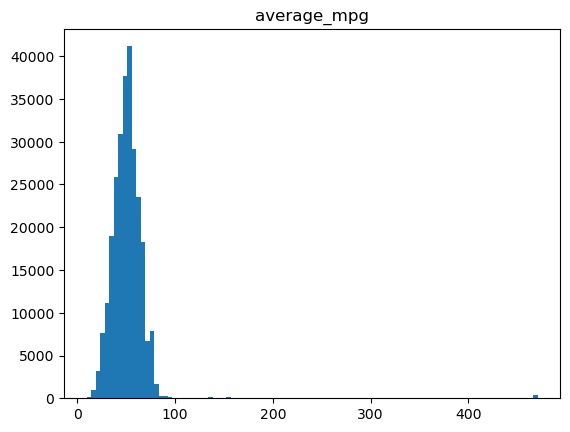

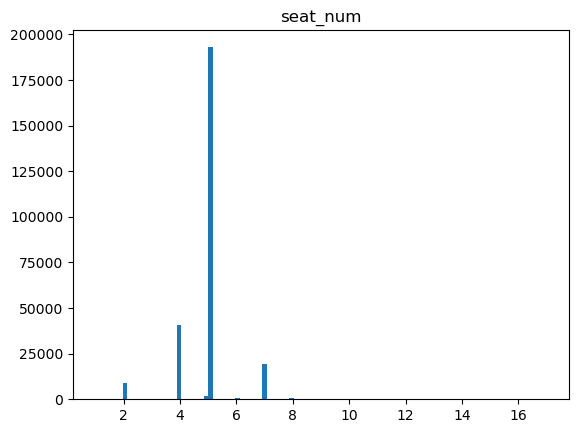

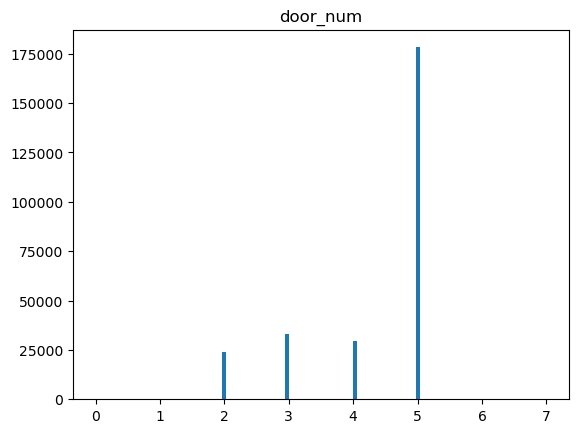

In [22]:
for i in num_cols:
    plt.hist(df_new[i], bins=100)
    plt.title(f"{i}")
    plt.show()

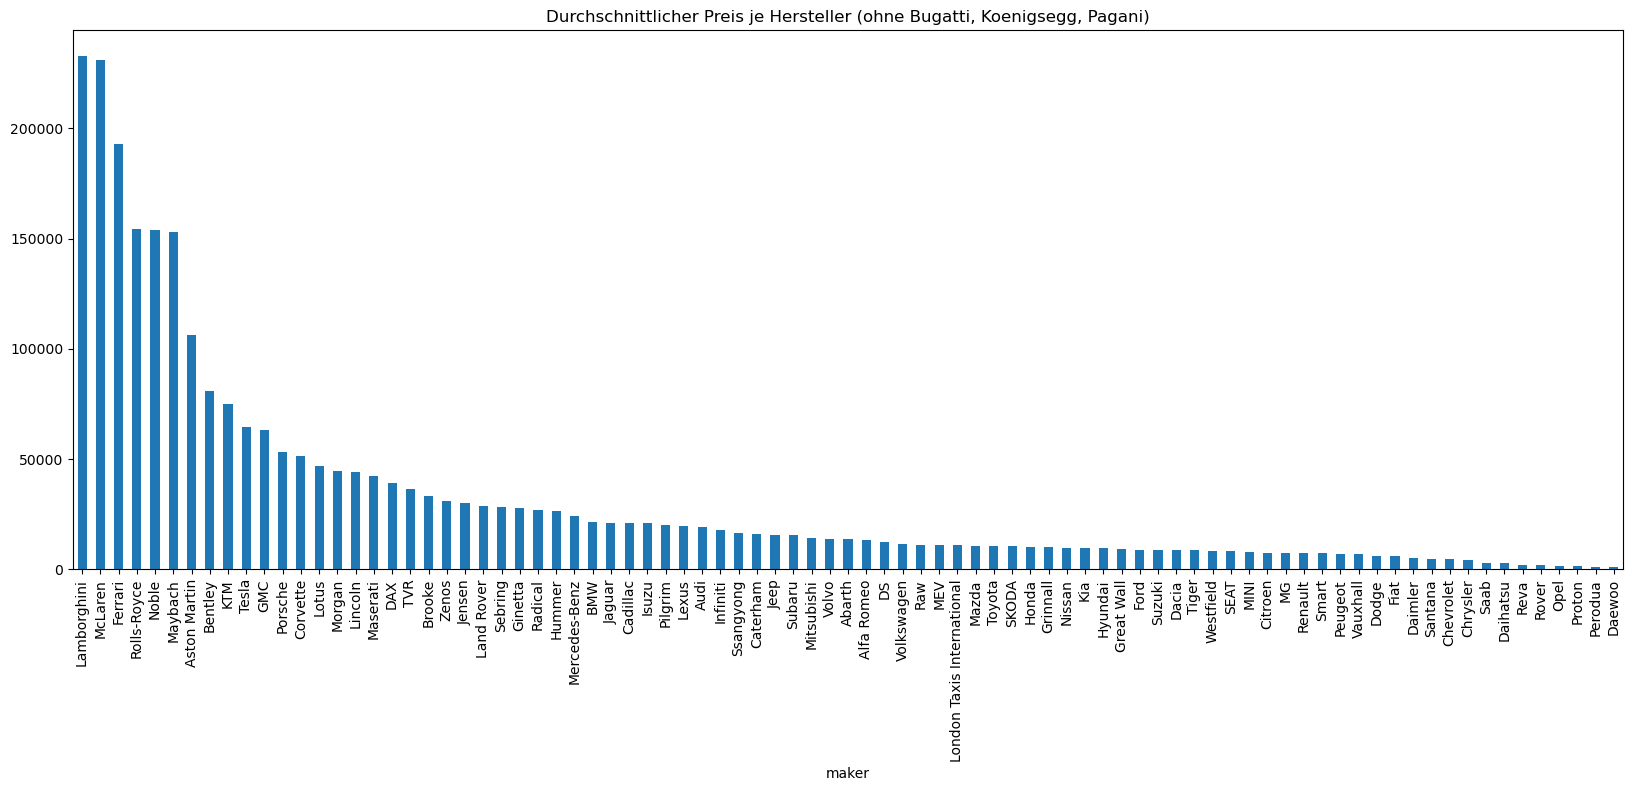

<Figure size 640x480 with 0 Axes>

In [23]:
mean_maker = df.groupby(by=["maker"])["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(20,7))
(mean_maker[mean_maker < 1000000]).plot(kind="bar")
plt.title("Durchschnittlicher Preis je Hersteller (ohne Bugatti, Koenigsegg, Pagani)")
plt.show()
plt.clf()

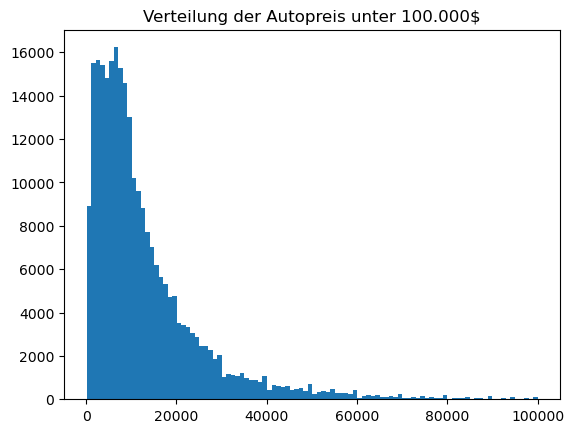

<Figure size 640x480 with 0 Axes>

In [24]:
plt.hist(df[df["price"] < 100000]["price"], bins=100)
plt.title("Verteilung der Autopreis unter 100.000$")
plt.show()
plt.clf()

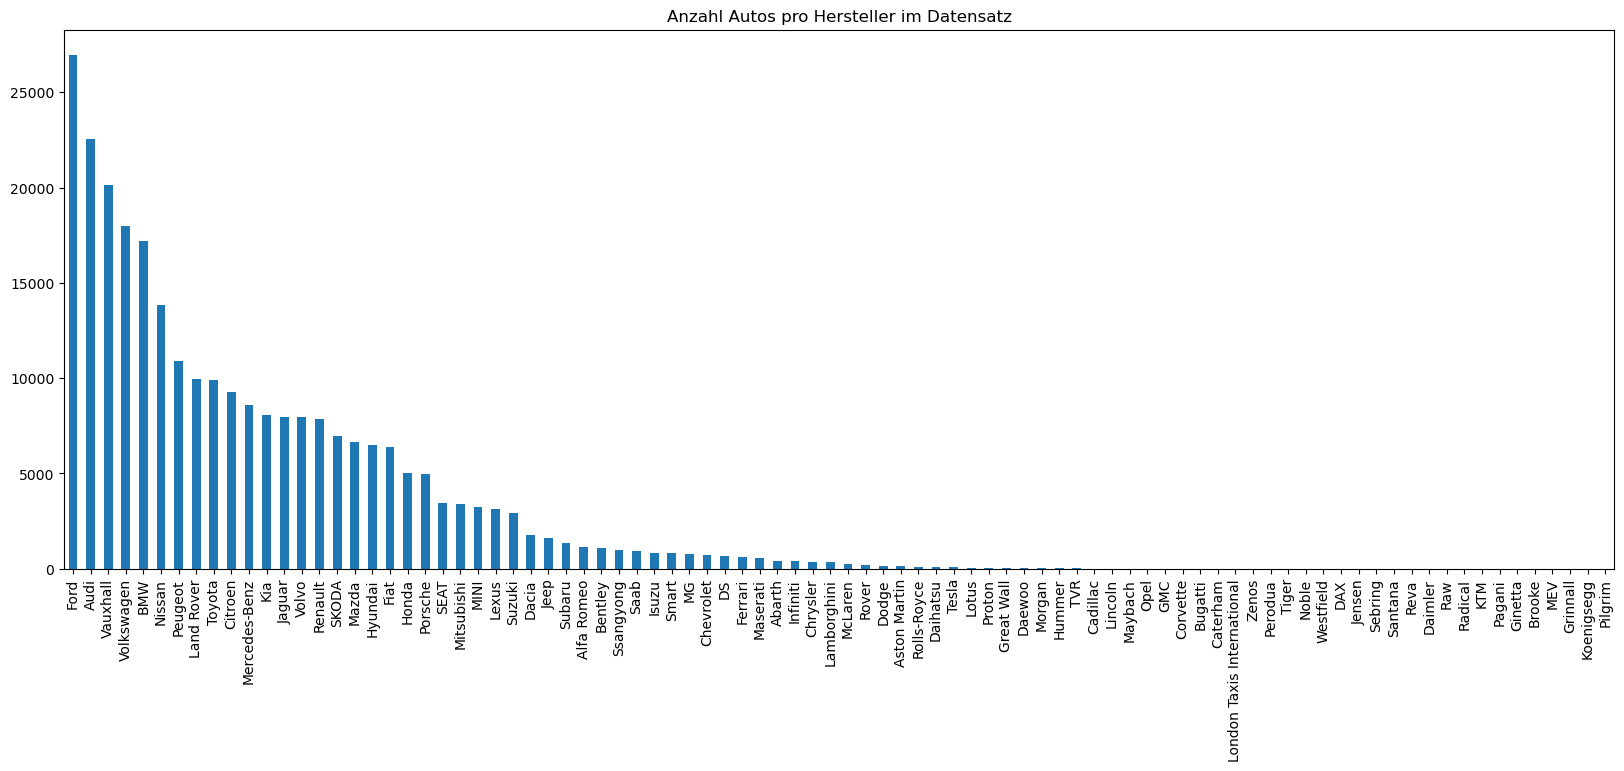

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(20,7))
df.maker.value_counts().plot(kind="bar")
plt.title("Anzahl Autos pro Hersteller im Datensatz")
plt.show()
plt.clf()

c:\Users\konwo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

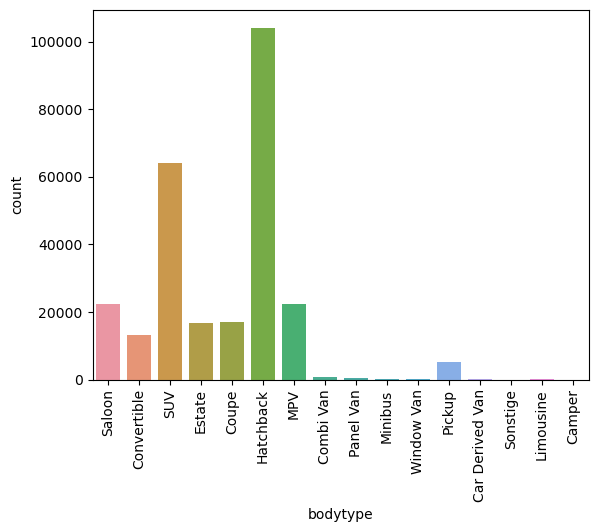

In [26]:
sns.countplot(df_new["bodytype"])
plt.xticks(rotation=90)
plt.show

In [27]:
df_fuel = df_new[df_new["fuel_type"].isin(["Petrol", "Diesel", "Electric"])]
df_fuel = df_fuel[df_fuel["bodytype"].isin(["Saloon", "COnvertible", "SUV", "Estate", "Coupe", "Hatchback"])]
df_fuel.head()

,reg_year,runned_miles,price,engine_power,width,length,average_mpg,seat_num,door_num,maker,genmodel,color,bodytype,gearbox,fuel_type,name
0,2000.0,60000.0,21500.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Silver,Saloon,Automatic,Petrol,Bentley Arnage
1,2002.0,44000.0,28750.0,450.000000,2125.0,5390.0,13.700000,5.0,4.0,Bentley,Arnage,Grey,Saloon,Automatic,Petrol,Bentley Arnage
2,2002.0,55000.0,29999.0,400.000000,2125.0,5390.0,14.700000,5.0,4.0,Bentley,Arnage,Blue,Saloon,Automatic,Petrol,Bentley Arnage
3,2003.0,14000.0,34948.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Green,Saloon,Automatic,Petrol,Bentley Arnage
4,2003.0,61652.0,26555.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Grey,Saloon,Automatic,Petrol,Bentley Arnage


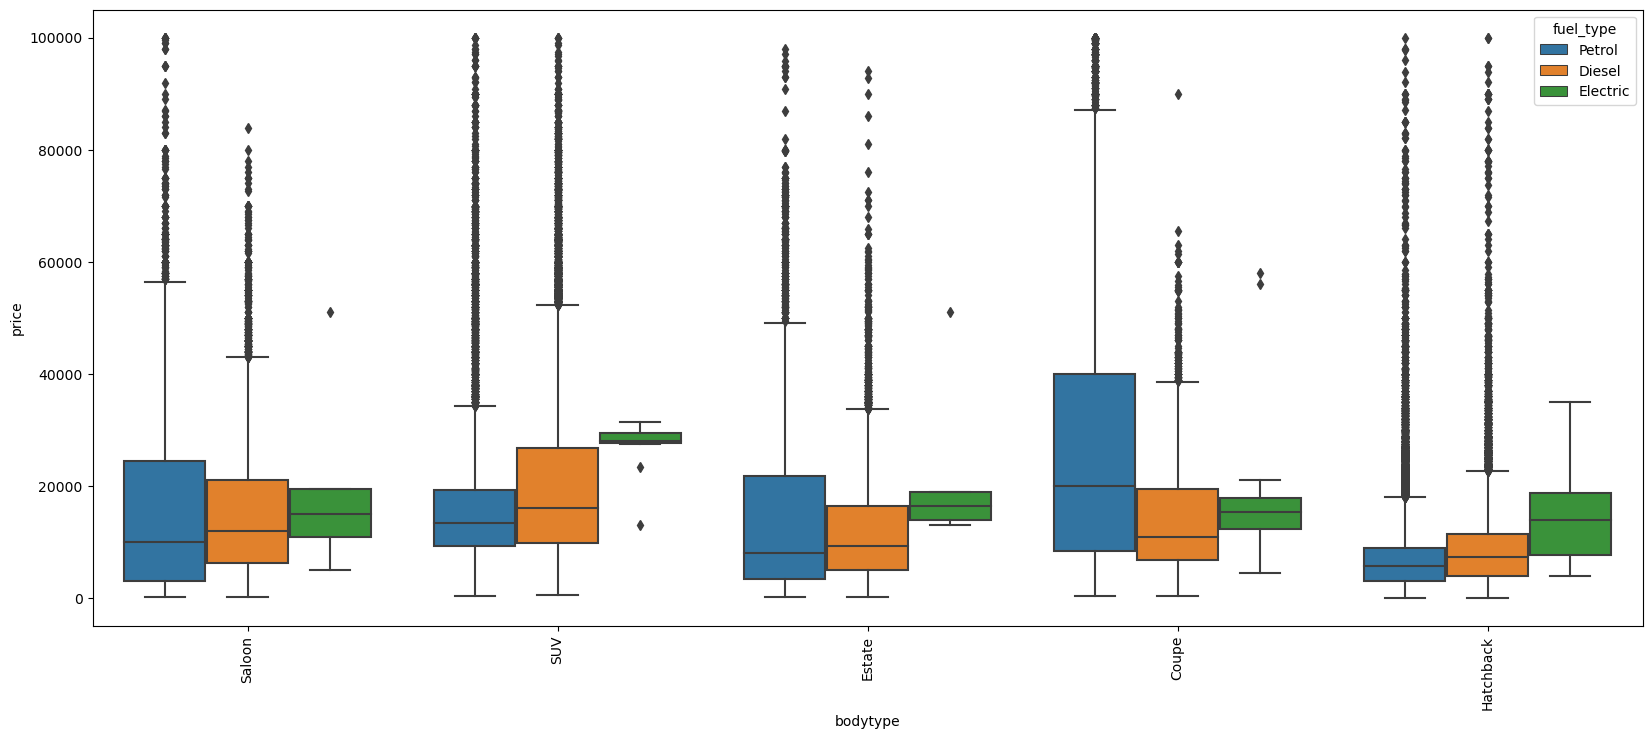

In [28]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df_fuel["bodytype"], y=df_fuel[df_fuel["price"]<100000]["price"],hue=df_fuel["fuel_type"])
plt.xticks(rotation=90)
plt.show()

In [29]:
df_maker = df_new[df_new["maker"].isin(list(df_new["maker"].value_counts().head().index))]
df_maker = df_maker[df_maker["bodytype"].isin(["Saloon", "Convertible", "SUV", "Estate", "Coupe", "Hatchback"])]
df_maker

,reg_year,runned_miles,price,engine_power,width,length,average_mpg,seat_num,door_num,maker,genmodel,color,bodytype,gearbox,fuel_type,name
21157,2016.0,12356.0,11199.0,98.120846,2067.0,4077.0,54.418832,5.0,5.000000,Ford,B-Max,Black,Hatchback,Manual,Petrol,Ford B-Max
21288,2015.0,18414.0,11390.0,98.120846,2067.0,4077.0,54.418832,5.0,5.000000,Ford,B-Max,Black,Hatchback,Manual,Petrol,Ford B-Max
21380,2017.0,4586.0,10490.0,98.120846,2067.0,4077.0,54.418832,5.0,5.000000,Ford,B-Max,Silver,Hatchback,Manual,Petrol,Ford B-Max
21544,2017.0,15153.0,12448.0,98.120846,2067.0,4077.0,54.418832,5.0,5.000000,Ford,B-Max,Blue,Hatchback,Automatic,Petrol,Ford B-Max
21654,2016.0,17083.0,9995.0,98.120846,2067.0,4077.0,54.418832,5.0,5.000000,Ford,B-Max,Black,Hatchback,Manual,Petrol,Ford B-Max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260145,2017.0,5820.0,41900.0,147.386667,1904.0,4890.0,43.847826,7.0,4.119048,Volkswagen,California,White,Hatchback,Manual,Diesel,Volkswagen California
260151,2017.0,2345.0,44950.0,147.386667,1904.0,4890.0,43.847826,7.0,4.119048,Volkswagen,California,White,Hatchback,Manual,Diesel,Volkswagen California
260154,2017.0,7026.0,48500.0,147.386667,1904.0,4890.0,43.847826,5.0,4.119048,Volkswagen,California,Black,Hatchback,Automatic,Diesel,Volkswagen California
260155,2017.0,5500.0,55995.0,147.386667,1904.0,4890.0,43.847826,5.0,4.119048,Volkswagen,California,Grey,Hatchback,Automatic,Diesel,Volkswagen California


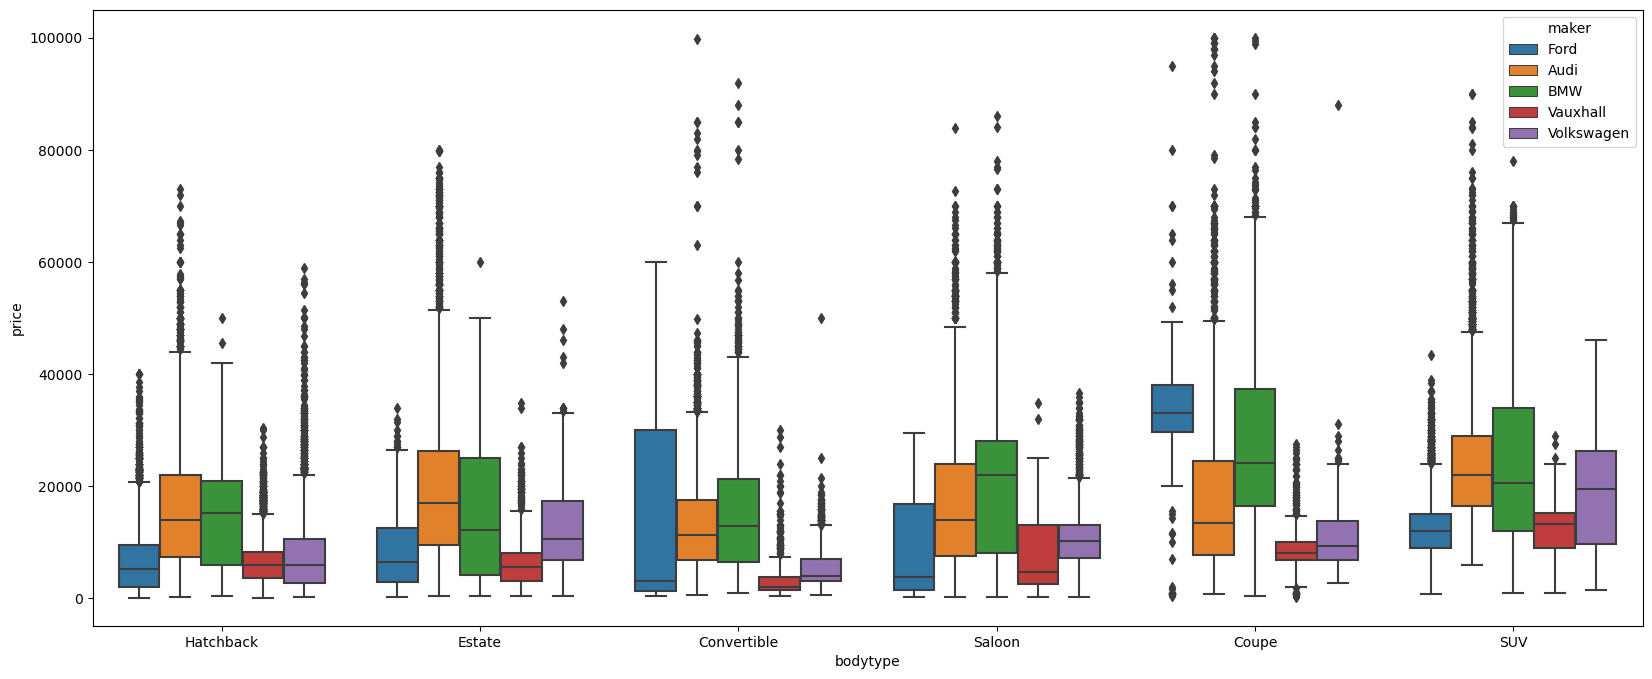

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df_maker["bodytype"], y=df_maker[df_maker["price"]<100000]["price"], hue=df_maker["maker"])
plt.show()

In [31]:
plot_test = df_maker.groupby(by=["reg_year", "maker"])["price"].mean()

In [32]:
plot_test_df = pd.DataFrame(plot_test)

In [33]:
plot_test_df = plot_test_df.reset_index()

In [34]:
plot_test_df = plot_test_df[plot_test_df.reg_year > 1990]

Text(0.5, 1.0, 'Durchschnittlicher Preis je Hersteller')

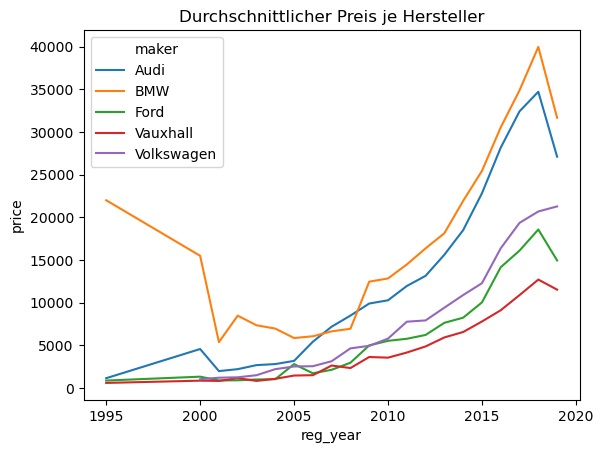

In [35]:
sns.lineplot(x=plot_test_df["reg_year"], y=plot_test_df["price"], hue=plot_test_df["maker"])
plt.title("Durchschnittlicher Preis je Hersteller")

In [36]:
df_prediction = df_new.copy()

In [37]:
df_prediction

,reg_year,runned_miles,price,engine_power,width,length,average_mpg,seat_num,door_num,maker,genmodel,color,bodytype,gearbox,fuel_type,name
0,2000.0,60000.0,21500.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Silver,Saloon,Automatic,Petrol,Bentley Arnage
1,2002.0,44000.0,28750.0,450.000000,2125.0,5390.0,13.700000,5.0,4.0,Bentley,Arnage,Grey,Saloon,Automatic,Petrol,Bentley Arnage
2,2002.0,55000.0,29999.0,400.000000,2125.0,5390.0,14.700000,5.0,4.0,Bentley,Arnage,Blue,Saloon,Automatic,Petrol,Bentley Arnage
3,2003.0,14000.0,34948.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Green,Saloon,Automatic,Petrol,Bentley Arnage
4,2003.0,61652.0,26555.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Grey,Saloon,Automatic,Petrol,Bentley Arnage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268129,2008.0,140000.0,3185.0,136.000000,1770.0,4522.0,48.700000,5.0,5.0,Volvo,V50,Grey,Estate,Manual,Diesel,Volvo V50
268130,2007.0,158000.0,2990.0,180.000000,1770.0,4522.0,40.400000,5.0,5.0,Volvo,V50,Blue,Estate,Automatic,Diesel,Volvo V50
268131,2009.0,94000.0,4250.0,178.000000,1770.0,4522.0,40.400000,5.0,5.0,Volvo,V50,Silver,Estate,Automatic,Diesel,Volvo V50
268132,2004.0,111000.0,2895.0,170.000000,1770.0,4514.0,31.000000,5.0,5.0,Volvo,V50,Silver,Estate,Automatic,Petrol,Volvo V50


In [38]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266666 entries, 0 to 268133
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reg_year      266666 non-null  float64
 1   runned_miles  266666 non-null  float64
 2   price         266666 non-null  float64
 3   engine_power  266666 non-null  float64
 4   width         266666 non-null  float64
 5   length        266666 non-null  float64
 6   average_mpg   266666 non-null  float64
 7   seat_num      266666 non-null  float64
 8   door_num      266666 non-null  float64
 9   maker         266666 non-null  object 
 10  genmodel      266666 non-null  object 
 11  color         266666 non-null  object 
 12  bodytype      266666 non-null  object 
 13  gearbox       266666 non-null  object 
 14  fuel_type     266666 non-null  object 
 15  name          266666 non-null  object 
dtypes: float64(9), object(7)
memory usage: 34.6+ MB


In [39]:
test = list(num_cols[1:])
test.remove("price")

In [40]:
prediciton_preprocessing = ColumnTransformer([
    ("scaler", StandardScaler(), test),
    ("encoder", OneHotEncoder(), cat_cols[:-1])
],
remainder="passthrough")

In [41]:
x = df_prediction.drop(columns=["price", "name"], axis=1)
y = df_prediction["price"]

In [42]:
x

,reg_year,runned_miles,engine_power,width,length,average_mpg,seat_num,door_num,maker,genmodel,color,bodytype,gearbox,fuel_type
0,2000.0,60000.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Silver,Saloon,Automatic,Petrol
1,2002.0,44000.0,450.000000,2125.0,5390.0,13.700000,5.0,4.0,Bentley,Arnage,Grey,Saloon,Automatic,Petrol
2,2002.0,55000.0,400.000000,2125.0,5390.0,14.700000,5.0,4.0,Bentley,Arnage,Blue,Saloon,Automatic,Petrol
3,2003.0,14000.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Green,Saloon,Automatic,Petrol
4,2003.0,61652.0,433.333333,2125.0,5390.0,13.922222,5.0,4.0,Bentley,Arnage,Grey,Saloon,Automatic,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268129,2008.0,140000.0,136.000000,1770.0,4522.0,48.700000,5.0,5.0,Volvo,V50,Grey,Estate,Manual,Diesel
268130,2007.0,158000.0,180.000000,1770.0,4522.0,40.400000,5.0,5.0,Volvo,V50,Blue,Estate,Automatic,Diesel
268131,2009.0,94000.0,178.000000,1770.0,4522.0,40.400000,5.0,5.0,Volvo,V50,Silver,Estate,Automatic,Diesel
268132,2004.0,111000.0,170.000000,1770.0,4514.0,31.000000,5.0,5.0,Volvo,V50,Silver,Estate,Automatic,Petrol


In [43]:
x_pre = prediciton_preprocessing.fit_transform(x)

In [44]:
all_column_names = list(prediciton_preprocessing.named_transformers_['scaler'].get_feature_names_out(input_features=test)) + list(prediciton_preprocessing.named_transformers_['encoder'].get_feature_names_out(input_features=cat_cols[:-1])) + ["reg_year"]

In [45]:
df_prediction2 = pd.DataFrame(x_pre.toarray(), columns=all_column_names)
df_prediction2

,runned_miles,engine_power,width,length,average_mpg,seat_num,door_num,maker_Abarth,maker_AlfaRomeo,maker_AstonMartin,...,fuel_type_Electric,fuel_type_Hybrid Diesel/Electric,fuel_type_Hybrid Diesel/Electric Plug-in,fuel_type_Hybrid Petrol/Electric,fuel_type_Hybrid Petrol/Electric Plug-in,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid,fuel_type_Sonstige,reg_year
0,0.295693,3.172417,1.537159,2.355253,-1.762321,0.110069,-0.365160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2000.0
1,-0.104606,3.362152,1.537159,2.355253,-1.772845,0.110069,-0.365160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002.0
2,0.170600,2.792946,1.537159,2.355253,-1.725486,0.110069,-0.365160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002.0
3,-0.855168,3.172417,1.537159,2.355253,-1.762321,0.110069,-0.365160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2003.0
4,0.337024,3.172417,1.537159,2.355253,-1.762321,0.110069,-0.365160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266661,2.297191,-0.212466,-0.854158,0.327455,-0.115289,0.110069,0.624709,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0
266662,2.747528,0.288436,-0.854158,0.327455,-0.508367,0.110069,0.624709,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
266663,1.146330,0.265668,-0.854158,0.327455,-0.508367,0.110069,0.624709,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009.0
266664,1.571648,0.174595,-0.854158,0.308766,-0.953539,0.110069,0.624709,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2004.0


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_prediction2, y, test_size=0.2, random_state=42)

In [47]:
x_train_pca = x_train.copy()
x_test_pca = x_test.copy()

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

pca.fit(x_train_pca)

x_train_pca = pca.transform(x_train_pca)
x_test_pca = pca.transform(x_test_pca)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from sklearn.metrics import r2_score, mean_absolute_error

In [152]:
nn_model = keras.Sequential()
nn_model.add(keras.layers.Input(shape=(x_train.shape[1]),))
nn_model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer="normal"))
nn_model.add(keras.layers.Dropout(rate=0.15))
nn_model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer="normal"))
nn_model.add(keras.layers.Dropout(rate=0.15))
nn_model.add(keras.layers.Dense(units=20, activation='relu', kernel_initializer="normal"))
nn_model.add(keras.layers.Dense(units=1))

callback = keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, verbose=1, min_delta=4, mode="min")

opt = keras.optimizers.Adam(learning_rate=0.0001)

nn_model.compile(loss=keras.losses.MeanSquaredError(), optimizer=opt, metrics=["mae"])

In [153]:
history = nn_model.fit(x_train, y_train, epochs=100, validation_split=0.25, callbacks= [callback])

Epoch 1/100
5000/5000 [==============================] - 12s 2ms/step - loss: 603304256.0000 - mae: 10951.1953 - val_loss: 2462319104.0000 - val_mae: 10999.8643
Epoch 2/100
5000/5000 [==============================] - 10s 2ms/step - loss: 588080832.0000 - mae: 10781.3047 - val_loss: 2454896896.0000 - val_mae: 10753.3359
Epoch 3/100
5000/5000 [==============================] - 10s 2ms/step - loss: 567966912.0000 - mae: 10308.8945 - val_loss: 2394473728.0000 - val_mae: 8773.3867
Epoch 4/100
5000/5000 [==============================] - 10s 2ms/step - loss: 434322880.0000 - mae: 7266.0312 - val_loss: 2229601536.0000 - val_mae: 6078.4126
Epoch 5/100
5000/5000 [==============================] - 10s 2ms/step - loss: 357724160.0000 - mae: 6548.0879 - val_loss: 2175666944.0000 - val_mae: 5928.2139
Epoch 6/100
5000/5000 [==============================] - 10s 2ms/step - loss: 325846784.0000 - mae: 6368.2222 - val_loss: 2143902976.0000 - val_mae: 5129.7388
Epoch 7/100
5000/5000 [==================

In [154]:
nn_model.evaluate(x_test, y_test)

1667/1667 [==============================] - 1s 831us/step - loss: 259983744.0000 - mae: 2665.8447


[259983744.0, 2665.8447265625]

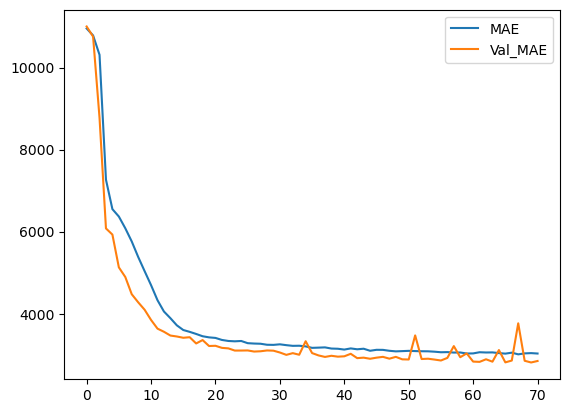

In [155]:
plt.plot(pd.DataFrame(history.history["mae"]), label="MAE")
plt.plot(pd.DataFrame(history.history["val_mae"]), label= "Val_MAE")
plt.legend()

In [156]:
y_pred_nn = nn_model.predict(x_test)
print(r2_score(y_pred_nn, y_test))
pd.DataFrame({"true": y_test,"predicted": y_pred_nn.flatten()})

   1/1667 [..............................] - ETA: 59s

1667/1667 [==============================] - 1s 743us/step
0.39645593929069944


,true,predicted
89478,30995.0,35274.179688
57881,750.0,1564.463989
60889,10788.0,13567.400391
133705,1999.0,3011.317383
45026,26750.0,29391.873047
...,...,...
160833,22892.0,19135.769531
76202,11000.0,9067.213867
131686,6290.0,6321.608887
37138,990.0,2298.495850


In [88]:
linear_reg = LinearRegression()
linear_reg_pca = LinearRegression()
lasso_reg = Lasso(alpha=0.5)
lasso_reg_pca = Lasso(alpha=0.5)
rrf = RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=2, max_depth=10)
rrf_pca = RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=2, max_depth=15)

In [51]:
lasso_grid = {"alpha": [0.5, 1, 1.5]}
rrf_grid = {"n_estimators" : [100],
            "min_samples_split": [4,8],
            'max_depth': [50, 100]}

In [89]:
lasso_grid_search = GridSearchCV(lasso_reg, lasso_grid, scoring="r2", n_jobs=-1, verbose=3, cv=4)
rrf_grid_search = GridSearchCV(rrf, rrf_grid, scoring="r2", n_jobs=-1, verbose=3, cv=2)

grids = [lasso_grid_search, rrf_grid_search]

In [175]:
#Linear Regression
linear_reg.fit(x_train, y_train)
linear_reg.score(x_test, y_test)

-1.0700188322042872e+16

In [176]:
linear_reg_pca.fit(x_train_pca, y_train)
linear_reg_pca.score(x_test_pca, y_test)

0.4141977952341115

In [305]:
## Lasso Regression
#lasso_grid_search.fit(x_train, y_train)
#print(lasso_grid_search.best_estimator_)
#print(lasso_grid_search.best_score_)

In [177]:
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

c:\Users\konwo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.397e+13, tolerance: 2.268e+10
  model = cd_fast.enet_coordinate_descent(


0.5988089083316444

In [307]:
lasso_reg_pca.fit(x_train_pca, y_train)
lasso_reg_pca.score(x_test_pca, y_test)

0.414194675872548

In [89]:
##Random Forrest Regressor
rrf.fit(x_train, y_train)
rrf.score(x_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.9s


building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.1min


building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.1min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished


0.8548475783332979

In [73]:
rrf_pca.fit(x_train_pca, y_train)
rrf_pca.score(x_test_pca, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.9s


building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min


building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished


0.6975211070826481

In [310]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

gbr = GradientBoostingRegressor(verbose=2)
gbr_pca = GradientBoostingRegressor(verbose=2)
abr = AdaBoostRegressor(n_estimators=200)
abr_pca = AdaBoostRegressor(n_estimators=200)

In [311]:
gbr.fit(x_train, y_train)
gbr.score(x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1   987051421.5037           11.40m
         2   923157100.8447            9.61m
         3   869363565.3015            8.98m
         4   823792872.4577            8.58m
         5   788655247.2838            8.33m
         6   754995084.0896            8.14m
         7   705849874.6581            7.99m
         8   679021113.9521            7.83m
         9   659167094.9346            7.71m
        10   642563787.0284            7.59m
        11   624976828.1769            7.46m
        12   612723018.1100            7.35m
        13   598510148.5912            7.25m
        14   523806705.1719            7.15m
        15   514258130.5862            7.09m
        16   480703350.4237            7.01m
        17   425554628.6379            6.91m
        18   403628951.1334            6.83m
        19   362742677.9483            6.73m
        20   357184865.8575            6.64m
        21   345839447.4726            6.55m
        2

0.8141688072472406

In [312]:
gbr_pca.fit(x_train_pca, y_train)
gbr_pca.score(x_test_pca, y_test)

      Iter       Train Loss   Remaining Time 
         1   918166765.9298            2.33m
         2   798917544.3165            2.26m
         3   702365374.4933            2.24m
         4   620678922.1919            2.23m
         5   551389895.0845            2.21m
         6   520099738.2240            2.19m
         7   492189214.4455            2.15m
         8   465798050.0287            2.13m
         9   445361466.4261            2.10m
        10   402035737.0460            2.08m
        11   385897645.9104            2.05m
        12   352053229.3393            2.03m
        13   339957389.7487            2.01m
        14   313115951.5233            1.98m
        15   298056718.8071            1.96m
        16   290071551.3815            1.93m
        17   281243361.3847            1.91m
        18   263306019.2233            1.89m
        19   248018759.8177            1.87m
        20   241749535.9452            1.84m
        21   229669656.3075            1.82m
        2

0.6010698961330223

In [313]:
abr.fit(x_train, y_train)
abr.score(x_test, y_test)

0.61401889818197

In [314]:
abr_pca.fit(x_train_pca, y_train)
abr_pca.score(x_test_pca, y_test)

-3.2522809025640322

In [315]:
print("Model Scores mit normalen Datensatz:")
print(f"Linear Regression {linear_reg.score(x_test, y_test)}")
print(f"Lasso Regression: {lasso_reg.score(x_test, y_test)}")
print(f"Random Forest Regressor: {rrf.score(x_test, y_test)}")
print(f"Gradient Boosting Regressor {gbr.score(x_test, y_test)}")
print(f"AdaBoost Regressor: {abr.score(x_test, y_test)}")

Model Scores mit normalen Datensatz:
Linear Regression -1.0700188322042872e+16
Lasso Regression: 0.5988089083316444


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.7s finished


Random Forest Regressor: 0.861095177381202
Gradient Boosting Regressor 0.8141688072472406
AdaBoost Regressor: 0.61401889818197


In [316]:
print("Model Scores mit PCA reduzierten Datensatz:")
print(f"Linear Regression {linear_reg_pca.score(x_test_pca, y_test)}")
print(f"Lasso Regression: {lasso_reg_pca.score(x_test_pca, y_test)}")
print(f"Random Forest Regressor: {rrf.score(x_test_pca, y_test)}")
print(f"Random Forest Regressor mit PCA: {rrf_pca.score(x_test_pca, y_test)}")
print(f"Gradient Boosting Regressor {gbr_pca.score(x_test_pca, y_test)}")
print(f"AdaBoost Regressor: {abr_pca.score(x_test_pca, y_test)}")

Model Scores mit PCA reduzierten Datensatz:
Linear Regression 0.4141980361158535
Lasso Regression: 0.414194675872548


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.5s finished


Random Forest Regressor: 0.7371171939638168
Gradient Boosting Regressor 0.6010698961330223
AdaBoost Regressor: -3.2522809025640322


c:\Users\konwo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\konwo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\konwo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\konwo\anaconda3\lib\si

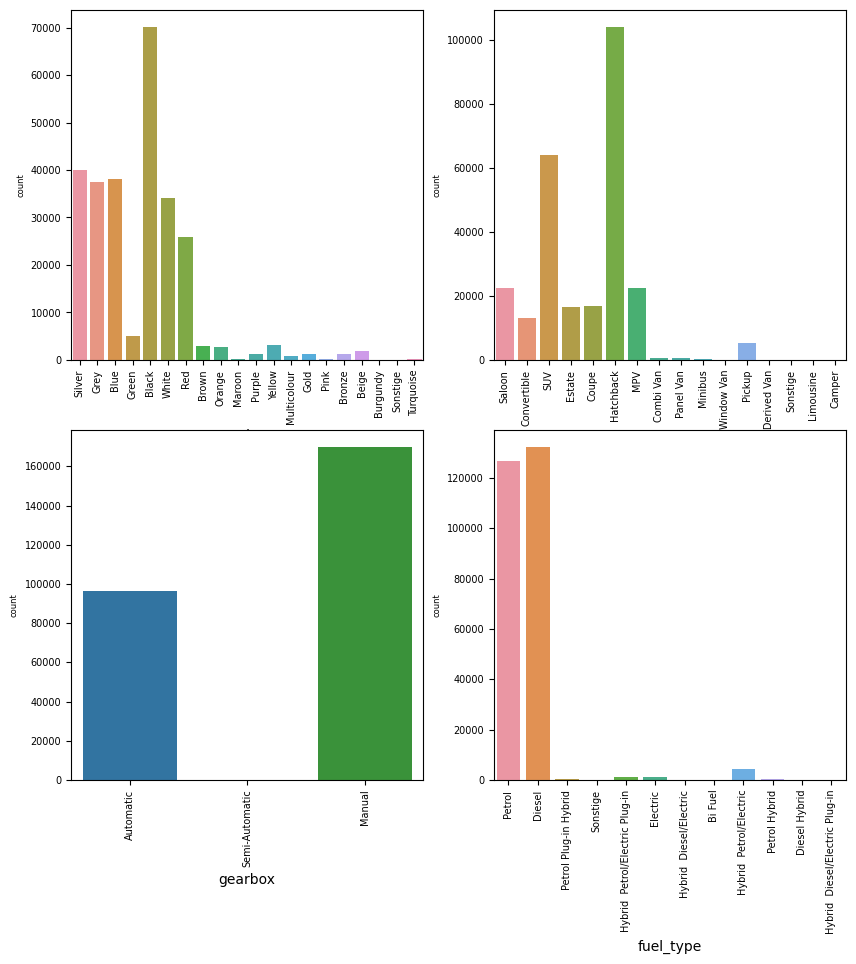

In [108]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
axes2 = [ax1, ax2, ax3, ax4]
for cat, ax in zip(cat_cols[2:-1], axes2):
    sns.countplot(df_prediction[cat], ax=ax)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.set_ylabel(ax.get_ylabel(), fontsize=6)

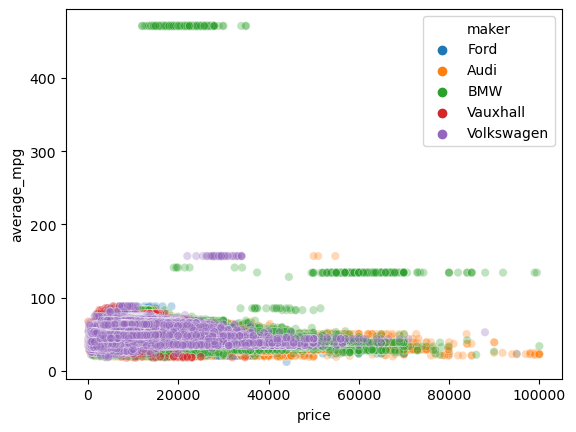

In [125]:
filtered_df = df_prediction[(df_prediction["price"] < 100000) & (df_prediction["maker"].isin(df_prediction["maker"].value_counts().head().index))]

sns.scatterplot(data=filtered_df, x="price", y="average_mpg", hue="maker", alpha=0.3)
plt.show()

       maker    genmodel  runned_miles         price
0     Abarth  124 Spider   6363.250000  22426.714286
1     Abarth         595  13380.622478  12779.904899
2     Abarth        595C  10154.172414  14774.310345
3  AlfaRomeo         159  97875.660377   3562.245283
4  AlfaRomeo       Brera  81156.840000   4937.520000


<AxesSubplot:xlabel='runned_miles', ylabel='price'>

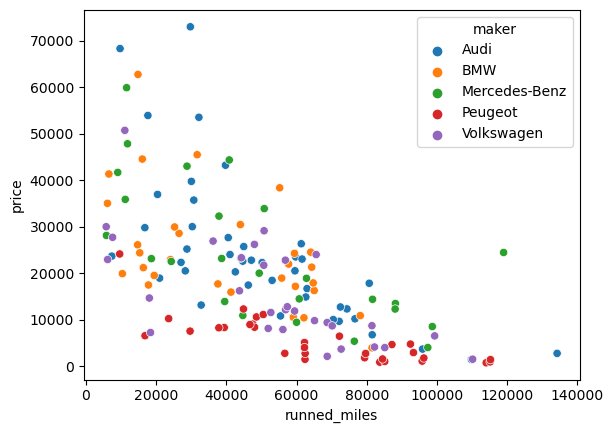

In [151]:
scatter_df = df_prediction.groupby(by=["maker", "genmodel"])[["runned_miles", "price"]].mean().reset_index()
print(scatter_df.head())

filtered = scatter_df[(scatter_df["price"] < 100000) & (scatter_df["runned_miles"] < 400000) & (scatter_df["maker"].isin(scatter_df["maker"].value_counts().head().index))] 
sns.scatterplot(data=filtered, y="price", x="runned_miles", hue="maker")